In [2]:
import pandas as pd
import numpy as np
import os
import seaborn as sns
import matplotlib.pyplot as plt
import librosa
import librosa.display
from IPython.display import Audio
import warnings
warnings.filterwarnings('ignore')

In [3]:
paths = []
labels = []
for dirname, _, filenames in os.walk('input'):
    for filename in filenames:
        paths.append(os.path.join(dirname, filename))
        label = filename.split('_')[-1]
        label = label.split('.')[0]
        labels.append(label.lower())
    if len(paths) == 2800:
        break
print('Dataset is Loaded')

Dataset is Loaded


In [4]:
len(paths)

4554

In [5]:
paths[:5]

['input\\TESS Toronto emotional speech set data\\OAF_happy\\OAF_gaze_happy.wav',
 'input\\TESS Toronto emotional speech set data\\OAF_happy\\OAF_germ_happy.wav',
 'input\\TESS Toronto emotional speech set data\\OAF_happy\\OAF_get_happy.wav',
 'input\\TESS Toronto emotional speech set data\\OAF_happy\\OAF_gin_happy.wav',
 'input\\TESS Toronto emotional speech set data\\OAF_happy\\OAF_goal_happy.wav']

In [6]:
labels[:5]

['happy', 'happy', 'happy', 'happy', 'happy']

In [7]:
## Create a dataframe
df = pd.DataFrame()
df['speech'] = paths
df['label'] = labels
df.head()

,speech,label
0,input\TESS Toronto emotional speech set data\O...,happy
1,input\TESS Toronto emotional speech set data\O...,happy
2,input\TESS Toronto emotional speech set data\O...,happy
3,input\TESS Toronto emotional speech set data\O...,happy
4,input\TESS Toronto emotional speech set data\O...,happy


In [8]:
df['label'].value_counts()

neutral    800
happy      754
angry      600
disgust    600
fear       600
ps         600
sad        600
Name: label, dtype: int64

In [10]:
# sns.countplot(df['label'])

In [13]:
def waveplot(data, sr, emotion):
    plt.figure(figsize=(10,4))
    plt.title(emotion, size=20)
    plt.plot(data)
    plt.show()
    
def spectogram(data, sr, emotion):
    x = librosa.stft(data)
    xdb = librosa.amplitude_to_db(abs(x))
    plt.figure(figsize=(11,4))
    plt.title(emotion, size=20)
    librosa.display.specshow(xdb, sr=sr, x_axis='time', y_axis='hz')
    plt.colorbar()

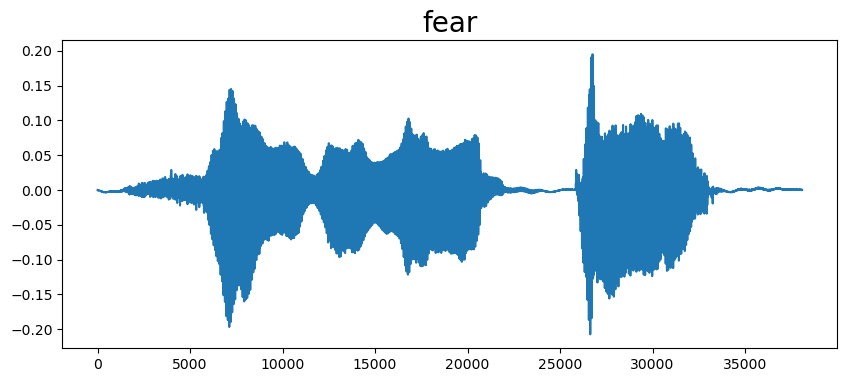

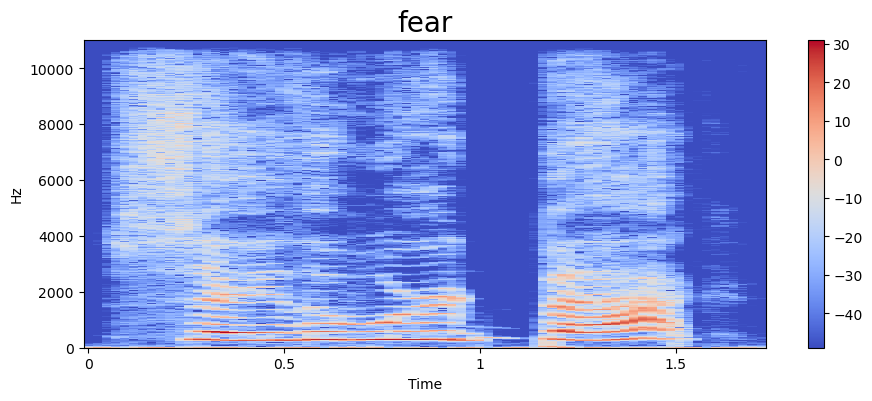

In [14]:
emotion = 'fear'
path = np.array(df['speech'][df['label']==emotion])[0]
data, sampling_rate = librosa.load(path)
waveplot(data, sampling_rate, emotion)
spectogram(data, sampling_rate, emotion)
Audio(path)

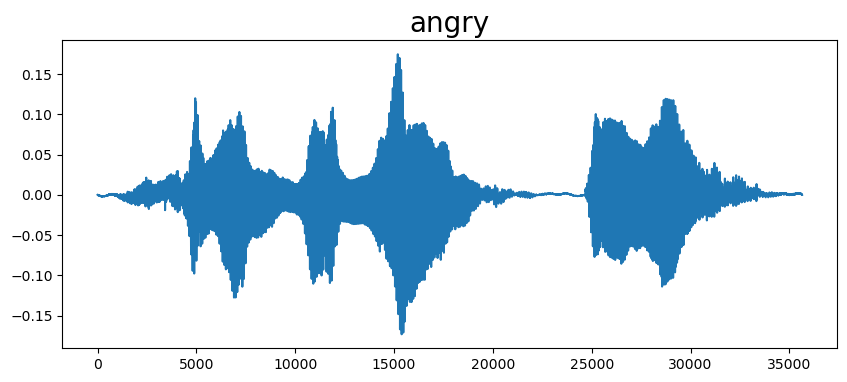

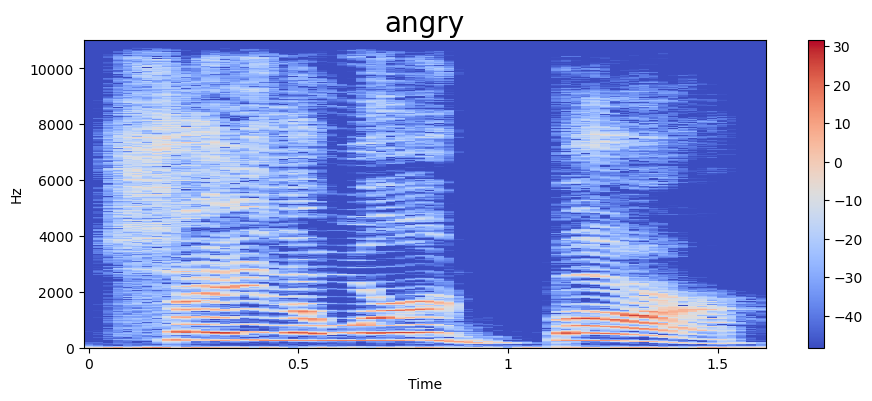

In [15]:
emotion = 'angry'
path = np.array(df['speech'][df['label']==emotion])[1]
data, sampling_rate = librosa.load(path)
waveplot(data, sampling_rate, emotion)
spectogram(data, sampling_rate, emotion)
Audio(path)

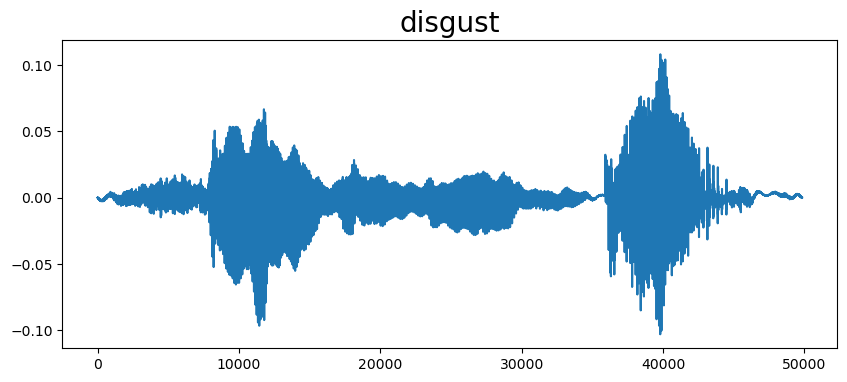

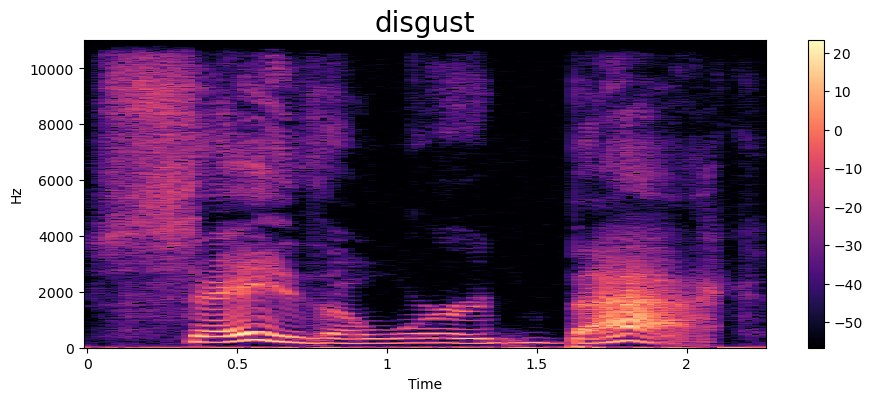

In [16]:
emotion = 'disgust'
path = np.array(df['speech'][df['label']==emotion])[0]
data, sampling_rate = librosa.load(path)
waveplot(data, sampling_rate, emotion)
spectogram(data, sampling_rate, emotion)
Audio(path)

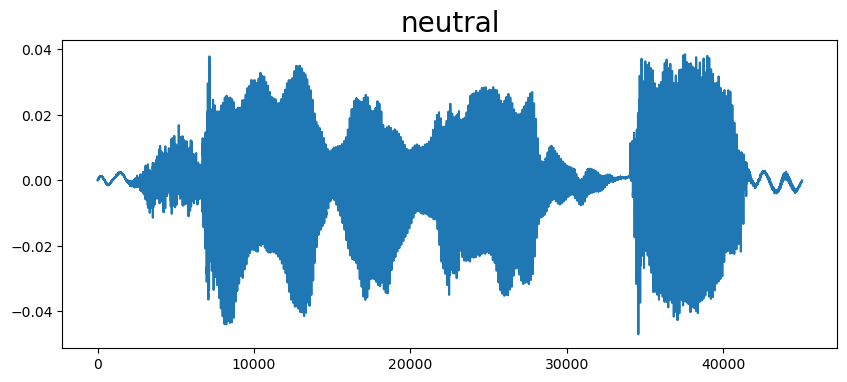

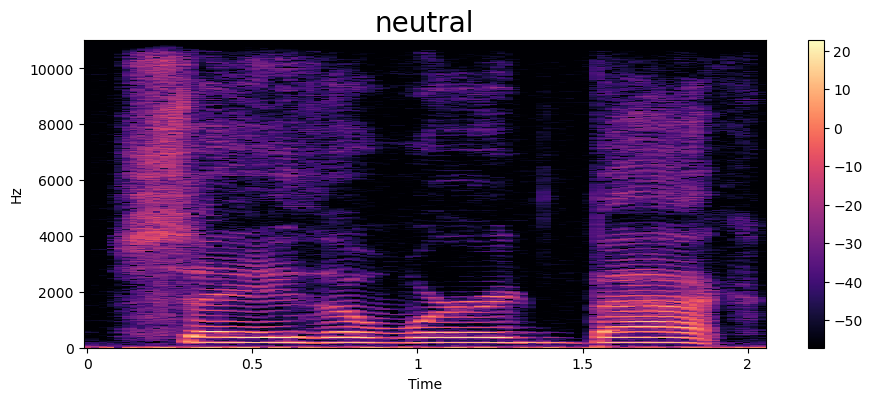

In [17]:
emotion = 'neutral'
path = np.array(df['speech'][df['label']==emotion])[0]
data, sampling_rate = librosa.load(path)
waveplot(data, sampling_rate, emotion)
spectogram(data, sampling_rate, emotion)
Audio(path)

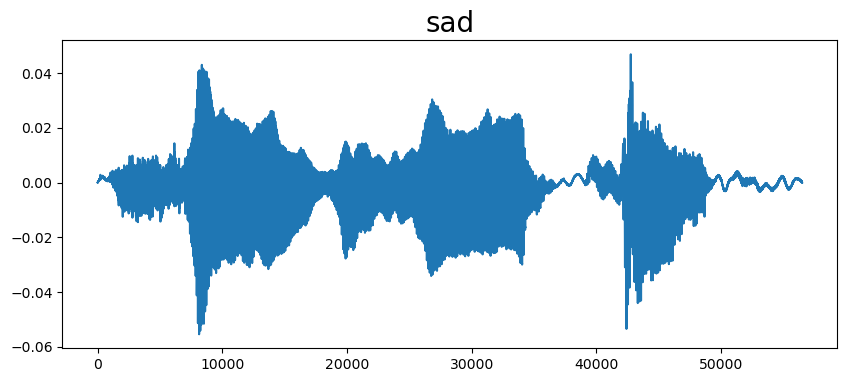

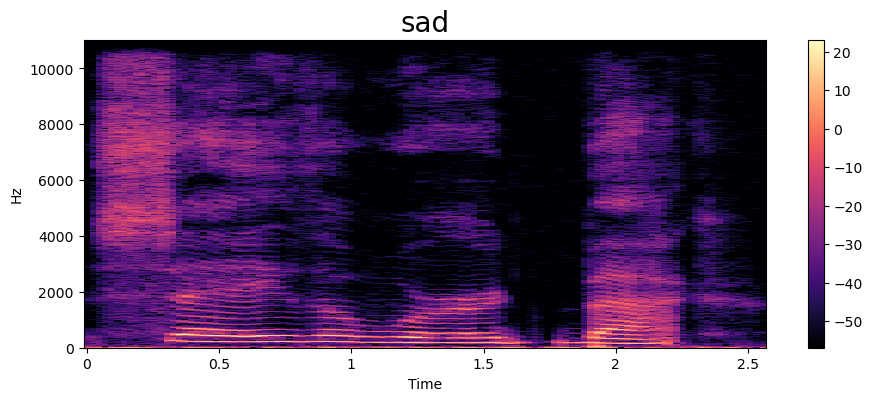

In [18]:
emotion = 'sad'
path = np.array(df['speech'][df['label']==emotion])[0]
data, sampling_rate = librosa.load(path)
waveplot(data, sampling_rate, emotion)
spectogram(data, sampling_rate, emotion)
Audio(path)

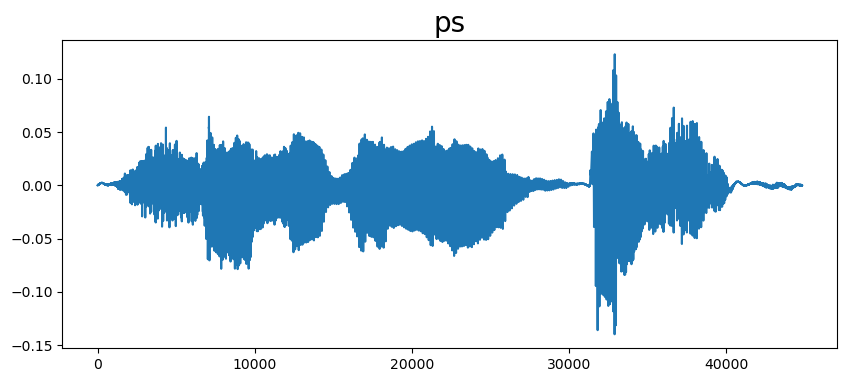

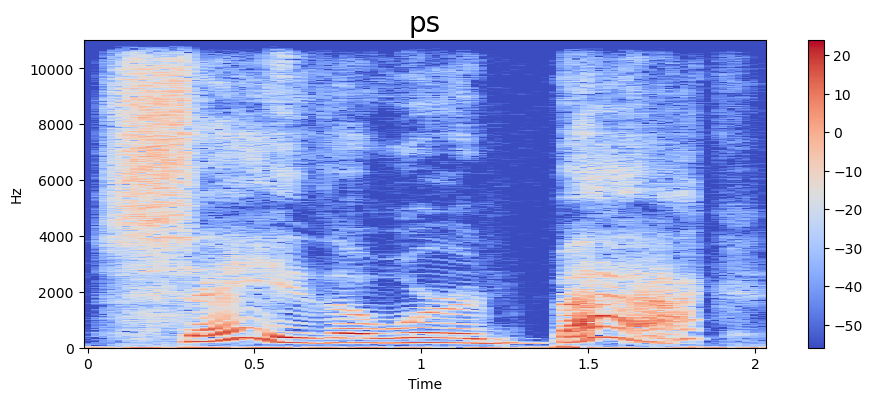

In [19]:
emotion = 'ps'
path = np.array(df['speech'][df['label']==emotion])[0]
data, sampling_rate = librosa.load(path)
waveplot(data, sampling_rate, emotion)
spectogram(data, sampling_rate, emotion)
Audio(path)

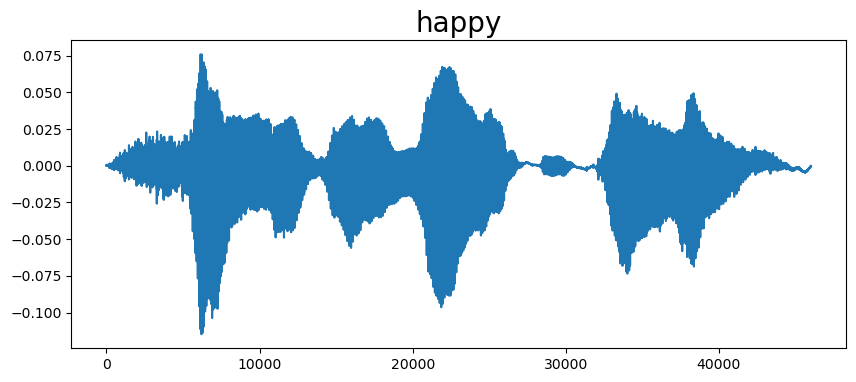

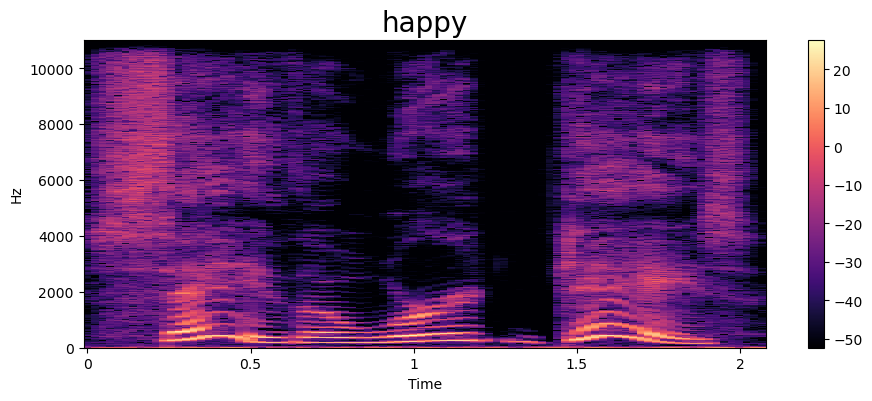

In [20]:
emotion = 'happy'
path = np.array(df['speech'][df['label']==emotion])[0]
data, sampling_rate = librosa.load(path)
waveplot(data, sampling_rate, emotion)
spectogram(data, sampling_rate, emotion)
Audio(path)

In [21]:
def extract_mfcc(filename):
    y, sr = librosa.load(filename, duration=3, offset=0.5)
    mfcc = np.mean(librosa.feature.mfcc(y=y, sr=sr, n_mfcc=40).T, axis=0)
    return mfcc

In [22]:
extract_mfcc(df['speech'][0])

array([-4.8246960e+02,  8.3868301e+01,  2.4118885e+01,  5.4850831e+00,
        7.7531085e+00,  4.0143701e-01, -1.2635370e+01, -1.1702840e+00,
       -1.5922855e+01, -5.4942412e+00, -1.6556816e+01, -4.0042462e+00,
       -5.4576454e+00, -6.5714812e+00,  2.0735857e-01,  6.7601597e-01,
        2.1061510e-02,  1.1653311e+01, -7.2856766e-01,  9.6236035e-02,
       -2.3158991e-01, -3.9003778e+00, -1.6925581e+00,  4.8299394e+00,
       -4.5500484e+00,  7.7644238e+00, -4.0914106e-01,  8.5948286e+00,
        1.9105740e+00,  5.5765309e+00,  7.0172834e-01,  5.3500886e+00,
        5.0640135e+00,  6.0657082e+00,  5.2935939e+00,  1.0089927e+01,
        1.1806219e+01,  1.3235069e+01,  1.2929440e+01,  1.1319752e+01],
      dtype=float32)

In [23]:
X_mfcc = df['speech'].apply(lambda x: extract_mfcc(x))

In [24]:
X_mfcc

0       [-482.4696, 83.8683, 24.118885, 5.485083, 7.75...
1       [-477.0122, 100.8071, 24.681585, -17.878584, 1...
2       [-472.76822, 99.01511, 16.761557, -5.4616694, ...
3       [-479.32584, 92.79443, 27.40693, 5.948233, 10....
4       [-470.9525, 112.84687, 42.378017, -12.181913, ...
                              ...                        
4549    [-406.48053, 80.379875, 32.462395, 46.579094, ...
4550    [-426.90918, 102.54757, 24.800041, 43.048096, ...
4551    [-378.50494, 80.91062, 35.300533, 39.74792, -4...
4552    [-434.8618, 89.906364, 28.37326, 39.57707, -2....
4553    [-421.8341, 70.69788, 32.476387, 45.642555, 4....
Name: speech, Length: 4554, dtype: object

In [25]:
X = [x for x in X_mfcc]
X = np.array(X)
X.shape

(4554, 40)

In [26]:
## input split
X = np.expand_dims(X, -1)
X.shape

(4554, 40, 1)

In [27]:

from sklearn.preprocessing import OneHotEncoder
enc = OneHotEncoder()
y = enc.fit_transform(df[['label']])

In [28]:
y = y.toarray()

In [29]:
y.shape

(4554, 7)

In [30]:
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout

model = Sequential([
    LSTM(256, return_sequences=False, input_shape=(40,1)),
    Dropout(0.2),
    Dense(128, activation='relu'),
    Dropout(0.2),
    Dense(64, activation='relu'),
    Dropout(0.2),
    Dense(7, activation='softmax')
])

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 256)               264192    
                                                                 
 dropout (Dropout)           (None, 256)               0         
                                                                 
 dense (Dense)               (None, 128)               32896     
                                                                 
 dropout_1 (Dropout)         (None, 128)               0         
                                                                 
 dense_1 (Dense)             (None, 64)                8256      
                                                                 
 dropout_2 (Dropout)         (None, 64)                0         
                                                                 
 dense_2 (Dense)             (None, 7)                 4

In [31]:
# Train the model
history = model.fit(X, y, validation_split=0.2, epochs=50, batch_size=64)

Epoch 1/50
57/57 [==============================] - 59s 568ms/step - loss: 1.0718 - accuracy: 0.5880 - val_loss: 0.4436 - val_accuracy: 0.8079
Epoch 2/50
57/57 [==============================] - 22s 396ms/step - loss: 0.3449 - accuracy: 0.8746 - val_loss: 0.5199 - val_accuracy: 0.8321
Epoch 3/50
57/57 [==============================] - 21s 377ms/step - loss: 0.2006 - accuracy: 0.9385 - val_loss: 0.0893 - val_accuracy: 0.9715
Epoch 4/50
57/57 [==============================] - 21s 376ms/step - loss: 0.1274 - accuracy: 0.9605 - val_loss: 0.0292 - val_accuracy: 0.9901
Epoch 5/50
57/57 [==============================] - 22s 394ms/step - loss: 0.1535 - accuracy: 0.9555 - val_loss: 0.0558 - val_accuracy: 0.9835
Epoch 6/50
57/57 [==============================] - 23s 399ms/step - loss: 0.0937 - accuracy: 0.9706 - val_loss: 0.0399 - val_accuracy: 0.9879
Epoch 7/50
57/57 [==============================] - 24s 418ms/step - loss: 0.0953 - accuracy: 0.9728 - val_loss: 0.0495 - val_accuracy: 0.9857

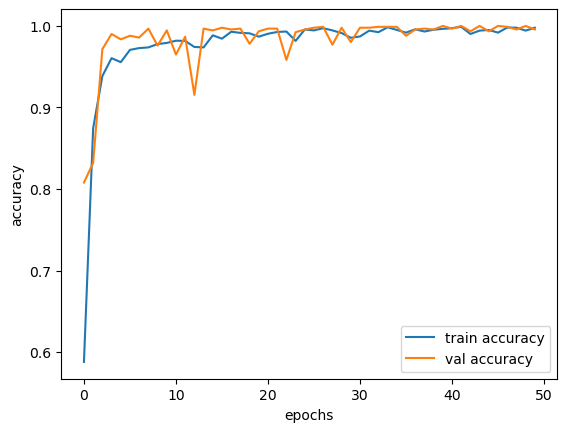

In [35]:
epochs = list(range(50))
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

plt.plot(epochs, acc, label='train accuracy')
plt.plot(epochs, val_acc, label='val accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show()

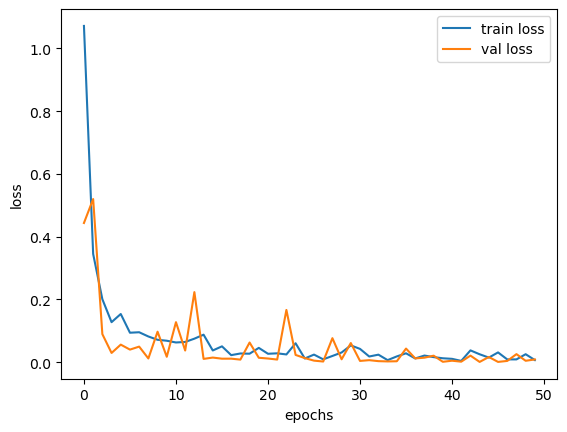

In [33]:
loss = history.history['loss']
val_loss = history.history['val_loss']

plt.plot(epochs, loss, label='train loss')
plt.plot(epochs, val_loss, label='val loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.show()